# 2023 AI/ML UnicornGym - Track 1

@jesamkim | 2023-Feb-07

# 1. 데이터 분석

#### Titanic 데이터셋 소개 (from kaggle)

> Titanic은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선 입니다.
> 1912년 4월 10일 영국의 사우스샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였습니다.
> 배에는 승객들을 태울 충분한 구명보트가 없었고, 타이타닉의 침몰로 2,224명의 승객 중 1,502명이 사망하였습니다.

#### 예측 (문제의 목표)

> Titanic에서 살아남을 수 있는 승객 예측  --> "Suvived"가 0인지 1인지 예측

### Setup Environment

In [20]:
%load_ext autoreload
%autoreload 2

# src 폴더 경로 설정
import sys
sys.path.append('./src')

## 노트북에 있는 로컬 데이터(titanic dataset) 불러오기

In [7]:
import pandas as pd
import os

train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 데이터 설명
* Survived : 0 -> 사망 , 1 -> 생존
* Pclass : 등급 -> 1등석, 2등석..
* Name : 승객 이름
* Age : 승객 나이
* Sex : 승객 성별
* SibSp : 동승한 자매, 배우자 수
* Parch : 동승한 부모, 자식 수
* Ticket : 티켓 번호
* Fare : 탑승 요금
* Cabin : 방 호수
* Embarked : 탑승지 (C -> 셰르부르, Q -> 퀸즈타운, S -> 사우샘프턴)

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


위의 test 데이터셋은 train과 동일하지만 예측하려는 정보인 "Survived" 가 빠져 있음

## 데이터 구조 확인 : 데이터 타입

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 데이터 구조 확인 : rows, columns 및 각 column당 유니크 값 수

In [18]:
print("train dataset - (rows, columns) : ", train.shape)
print("train dataset Shape:")
train.nunique()

train dataset - (rows, columns) :  (891, 12)
train dataset Shape:


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
              ... 
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Length: 12, dtype: int64

In [19]:
print("test dataset - (rows, columns) : ", test.shape)
print("test dataset Shape:")
test.nunique()

test dataset - (rows, columns) :  (418, 11)
test dataset Shape:


PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
              ... 
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
Length: 11, dtype: int64

## 챠트 그래프로 컬럼별 영향도 확인

In [22]:
from eda_utils import show_chart

### "탑승 등급"에 따른 생존 / 사망 비율

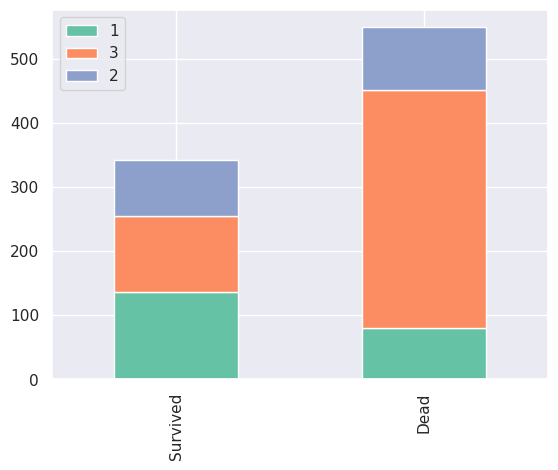

In [23]:
show_chart(train, 'Pclass')

### "성별"에 따른 생존 / 사망 비율

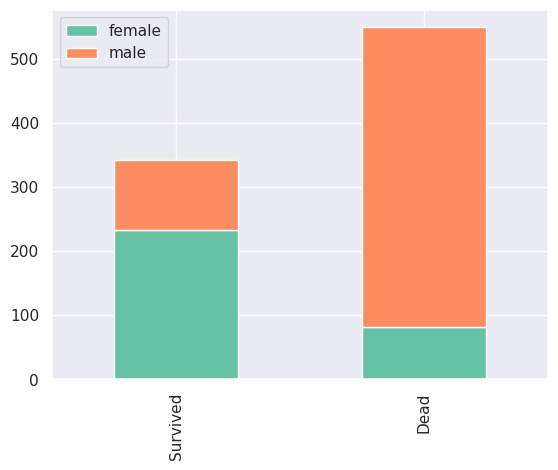

In [25]:
show_chart(train, 'Sex')

### "자매와 배우자 수"에 따른 생존 / 사망 비율

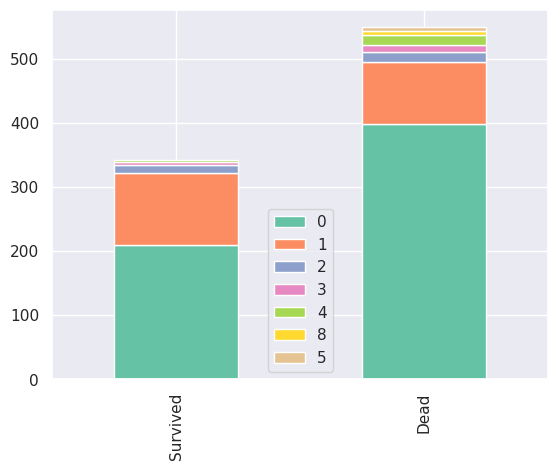

In [26]:
show_chart(train, 'SibSp')

### "탑승지"에 따른 생존 / 사망 비율

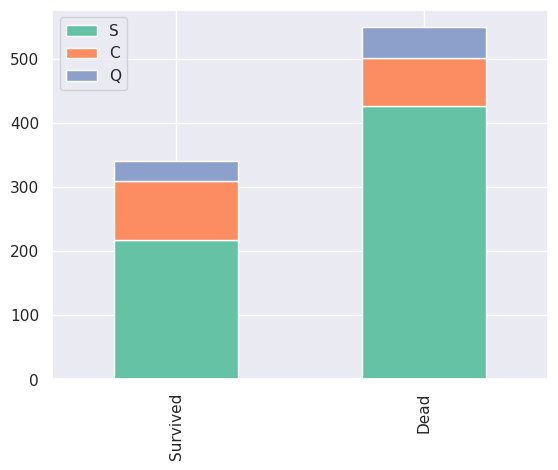

In [27]:
show_chart(train, 'Embarked')